In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=False)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=False)

c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


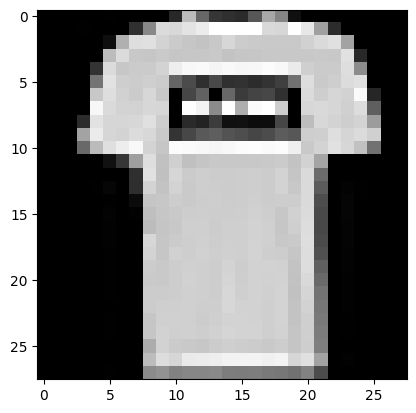

In [3]:
img,_ = training_set[1]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.io import read_image

class AutoencDataset(Dataset):
    def __init__(self, image):
        self.image = image

    def __getitem__(self, index):
        return self.image[index]

    def __len__(self):
        return len(self.image)

image,_ = training_set[1]  
dataset = AutoencDataset(image)
feat_size = image.size(1) * image.size(2)
print(feat_size)
train_loader = DataLoader(dataset) 

784


torch.Size([1, 28, 28])


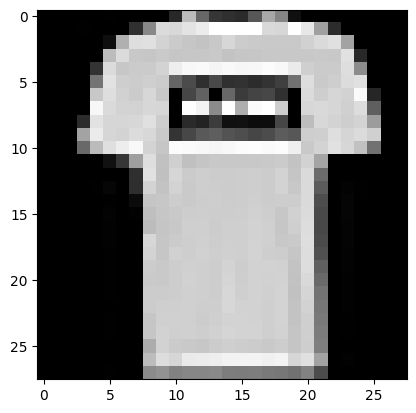

In [5]:
# Reconstruct from DataLoader
for batch in train_loader:
    print(batch.size())
    image = batch.squeeze() 
    plt.imshow(image, cmap='gray')
    plt.show()

In [7]:
class Autoencoder(torch.nn.Module):
  def __init__(self, feat_size, latent_dim):
    super().__init__()
    self.latent_dim = latent_dim
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(feat_size, latent_dim),
        torch.nn.ReLU()
    )
    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(latent_dim, feat_size),
        torch.nn.Sigmoid()
    )

  def forward (self, x):
    latent_space = self.encoder(x)
    x_hat = self.decoder(latent_space)
    return x_hat

In [22]:
# Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")
lr = 1e-2
loss_fn = torch.nn.MSELoss()

latent_dim = [2, 4, 8, 16, 32, 64, 128, 256]

Using cuda device


In [23]:
# Train Loop
import os
from tqdm import tqdm

epochs = 50
train_dim = []

for dim in latent_dim:
    model = Autoencoder(feat_size=feat_size, latent_dim=dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_loss = []
    for _ in tqdm(range(epochs)):
        running_loss = 0.0
        for batch in train_loader:
            feat = batch.view(-1, feat_size).to(device)     
            pred = model(feat)
            loss = loss_fn(pred, feat)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)  
        print(f"Epoch {epoch_loss}")
        train_loss.append(epoch_loss)
    
    train_dim.append(train_loss)    

    print(f'Finished Training for dim: {dim}')
    torch.save(model.cpu(), f'model_dim{dim}.pth')


100%|██████████| 50/50 [00:00<00:00, 579.06it/s]


Epoch 1.0591689348220825
Epoch 1.1196633577346802
Epoch 1.097398281097412
Epoch 1.0409210920333862
Epoch 1.0474941730499268
Epoch 1.0439903736114502
Epoch 1.040391445159912
Epoch 1.03673255443573
Epoch 1.0330346822738647
Epoch 1.029311180114746
Epoch 1.0255714654922485
Epoch 1.021822214126587
Epoch 1.0180686712265015
Epoch 1.0143144130706787
Epoch 1.010562777519226
Epoch 1.0068162679672241
Epoch 1.0030767917633057
Epoch 0.9993460178375244
Epoch 0.9956256747245789
Epoch 0.9919168949127197
Epoch 0.9882206320762634
Epoch 0.9845378994941711
Epoch 0.9808695912361145
Epoch 0.9772161841392517
Epoch 0.9735784530639648
Epoch 0.9699571132659912
Epoch 0.9663523435592651
Epoch 0.9627647995948792
Epoch 0.9591948390007019
Epoch 0.9556427597999573
Epoch 0.9521088600158691
Epoch 0.9485936164855957
Epoch 0.9450969099998474
Epoch 0.9416192173957825
Epoch 0.93816077709198
Epoch 0.9347216486930847
Epoch 0.9313021302223206
Epoch 0.9279020428657532
Epoch 0.9245219230651855
Epoch 0.9211615324020386
Epoch 0.9

100%|██████████| 50/50 [00:00<00:00, 609.94it/s]


Epoch 1.0755785703659058
Epoch 1.1247884035110474
Epoch 1.105698823928833
Epoch 1.0711867809295654
Epoch 1.0201982259750366
Epoch 1.0354145765304565
Epoch 1.0241318941116333
Epoch 1.0177772045135498
Epoch 1.0051460266113281
Epoch 0.9961703419685364
Epoch 0.9838309288024902
Epoch 0.9717630743980408
Epoch 0.9598833918571472
Epoch 0.9457088708877563
Epoch 0.9330283999443054
Epoch 0.9187777042388916
Epoch 0.9041185975074768
Epoch 0.8901769518852234
Epoch 0.874836802482605
Epoch 0.8595750331878662
Epoch 0.844519317150116
Epoch 0.8287881016731262
Epoch 0.8128952383995056
Epoch 0.7972416877746582
Epoch 0.7812525033950806
Epoch 0.7648808360099792
Epoch 0.7485399842262268
Epoch 0.7321979403495789
Epoch 0.7157036662101746
Epoch 0.6990962028503418
Epoch 0.6824927926063538
Epoch 0.6659332513809204
Epoch 0.6493808031082153
Epoch 0.6328112483024597
Epoch 0.6162551641464233
Epoch 0.5997761487960815
Epoch 0.5834453105926514
Epoch 0.5673423409461975
Epoch 0.5515691637992859
Epoch 0.5362643599510193
Epo

100%|██████████| 50/50 [00:00<00:00, 615.98it/s]


Epoch 1.0611108541488647
Epoch 1.05424964427948
Epoch 1.050285816192627
Epoch 1.0463322401046753
Epoch 1.0423903465270996
Epoch 1.0384608507156372
Epoch 1.034544587135315
Epoch 1.0306419134140015
Epoch 1.026753306388855
Epoch 1.0228792428970337
Epoch 1.0190200805664062
Epoch 1.0151760578155518
Epoch 1.0113475322723389
Epoch 1.0075349807739258
Epoch 1.0037384033203125
Epoch 0.9999583959579468
Epoch 0.9961949586868286
Epoch 0.9924484491348267
Epoch 0.9887190461158752
Epoch 0.9850070476531982
Epoch 0.98131263256073
Epoch 0.9776360392570496
Epoch 0.973977267742157
Epoch 0.9703367352485657
Epoch 0.9667145013809204
Epoch 0.9631109237670898
Epoch 0.9595258831977844
Epoch 0.955959677696228
Epoch 0.9524124264717102
Epoch 0.9488843083381653
Epoch 0.945375382900238
Epoch 0.9418858885765076
Epoch 0.9384158253669739
Epoch 0.9349653720855713
Epoch 0.9315346479415894
Epoch 0.9281235933303833
Epoch 0.9247325658798218
Epoch 0.9213615655899048
Epoch 0.9180104732513428
Epoch 0.9146795272827148
Epoch 0.91

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1.059824824333191
Epoch 1.0580461025238037
Epoch 1.01920747756958
Epoch 1.0089912414550781
Epoch 0.9690812230110168
Epoch 0.9305161833763123
Epoch 0.8963829874992371
Epoch 0.8610872626304626
Epoch 0.8235145211219788
Epoch 0.7846412658691406
Epoch 0.7459658980369568
Epoch 0.7084585428237915
Epoch 0.6726463437080383
Epoch 0.6390594244003296
Epoch 0.6081591248512268
Epoch 0.5801197290420532
Epoch 0.5549973845481873


100%|██████████| 50/50 [00:00<00:00, 593.40it/s]


Epoch 0.5328977704048157
Epoch 0.5139070749282837
Epoch 0.4980935752391815
Epoch 0.4854465425014496
Epoch 0.47565847635269165
Epoch 0.46798697113990784
Epoch 0.46180829405784607
Epoch 0.45680680871009827
Epoch 0.45289477705955505
Epoch 0.45007947087287903
Epoch 0.4483051300048828
Epoch 0.44729769229888916
Epoch 0.446738600730896
Epoch 0.44640037417411804
Epoch 0.44604063034057617
Epoch 0.4456118643283844
Epoch 0.4452231228351593
Epoch 0.44499820470809937
Epoch 0.4449155628681183
Epoch 0.4448302388191223
Epoch 0.44462719559669495
Epoch 0.44430914521217346
Epoch 0.44397029280662537
Epoch 0.4436991810798645
Epoch 0.4435446560382843
Epoch 0.44349607825279236
Epoch 0.44349828362464905
Epoch 0.4434663653373718
Epoch 0.4433584213256836
Epoch 0.4432050585746765
Epoch 0.4430340528488159
Epoch 0.4428637623786926
Epoch 0.44272199273109436
Finished Training for dim: 16


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1.0585323572158813
Epoch 0.9893784523010254
Epoch 0.9165055751800537
Epoch 0.8191536664962769
Epoch 0.7253159284591675
Epoch 0.6508517861366272
Epoch 0.5873690843582153
Epoch 0.5346123576164246
Epoch 0.5001737475395203
Epoch 0.48170122504234314
Epoch 0.4701971709728241
Epoch 0.4624798595905304
Epoch 0.4572867453098297
Epoch 0.4550493359565735
Epoch 0.45492878556251526
Epoch 0.45411795377731323
Epoch 0.4523184597492218
Epoch 0.45096728205680847
Epoch 0.45056068897247314
Epoch 0.4502973258495331
Epoch 0.4496970474720001
Epoch 0.44868138432502747
Epoch 0.44809335470199585
Epoch 0.44788309931755066
Epoch 0.44770461320877075
Epoch 0.44732168316841125
Epoch 0.44688940048217773
Epoch 0.4466024339199066
Epoch 0.4462989270687103
Epoch 0.44603806734085083
Epoch 0.44586795568466187
Epoch 0.4458480775356293
Epoch 0.44575005769729614
Epoch 0.445514976978302


 68%|██████▊   | 34/50 [00:00<00:00, 337.41it/s]

Epoch 0.4452448785305023
Epoch 0.4450698792934418
Epoch 0.44500377774238586
Epoch 0.44490134716033936
Epoch 0.4447837173938751
Epoch 0.44463831186294556
Epoch 0.44454145431518555
Epoch 0.4445047974586487
Epoch 0.4444859027862549
Epoch 0.4443991780281067
Epoch 0.4442572295665741
Epoch 0.4441234767436981
Epoch 0.44407418370246887
Epoch 0.4440758228302002
Epoch 0.4440843462944031
Epoch 0.4440493881702423


100%|██████████| 50/50 [00:00<00:00, 376.34it/s]


Finished Training for dim: 32


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1.0551576614379883
Epoch 0.7986635565757751
Epoch 0.6267590522766113
Epoch 0.5108468532562256
Epoch 0.4794352054595947
Epoch 0.4756472408771515
Epoch 0.4746590256690979
Epoch 0.47234857082366943
Epoch 0.472391813993454
Epoch 0.4718179404735565
Epoch 0.47052884101867676
Epoch 0.4686860740184784
Epoch 0.46887144446372986
Epoch 0.46789756417274475
Epoch 0.46616190671920776
Epoch 0.4661427140235901
Epoch 0.4652857780456543
Epoch 0.4636462330818176
Epoch 0.46347713470458984
Epoch 0.4631284475326538
Epoch 0.4617234766483307
Epoch 0.46173450350761414
Epoch 0.4615786671638489
Epoch 0.4608035981655121
Epoch 0.46040987968444824
Epoch 0.46026310324668884
Epoch 0.4594188630580902
Epoch 0.4592960774898529
Epoch 0.4586629271507263
Epoch 0.4589955806732178
Epoch 0.45843949913978577
Epoch 0.4579751789569855
Epoch 0.45766985416412354
Epoch 0.45785781741142273
Epoch 0.4574207663536072
Epoch 0.45705172419548035
Epoch 0.4571036696434021
Epoch 0.45690223574638367
Epoch 0.45662128925323486
Epoch 0.456

100%|██████████| 50/50 [00:00<00:00, 553.20it/s]


Finished Training for dim: 64


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1.0556751489639282
Epoch 0.7202163934707642
Epoch 0.5211957097053528
Epoch 0.4809771180152893
Epoch 0.47356897592544556
Epoch 0.47479745745658875
Epoch 0.474047988653183
Epoch 0.4745379686355591
Epoch 0.4721337854862213
Epoch 0.4752257764339447
Epoch 0.4729826748371124
Epoch 0.47201821208000183
Epoch 0.4717268943786621
Epoch 0.47177815437316895
Epoch 0.4697427749633789
Epoch 0.47005707025527954
Epoch 0.4688321352005005
Epoch 0.4675167500972748
Epoch 0.4679613709449768
Epoch 0.466898649930954
Epoch 0.46629154682159424
Epoch 0.4658728539943695
Epoch 0.46490269899368286
Epoch 0.4639591872692108
Epoch 0.46442750096321106
Epoch 0.4633471965789795
Epoch 0.4626009464263916
Epoch 0.46282657980918884
Epoch 0.4619606137275696
Epoch 0.461866557598114
Epoch 0.4615771174430847
Epoch 0.4614475667476654
Epoch 0.4610305726528168
Epoch 0.4607582092285156
Epoch 0.4603588283061981
Epoch 0.46062493324279785
Epoch 0.4600859582424164
Epoch 0.4600881338119507
Epoch 0.46008774638175964
Epoch 0.459762632

100%|██████████| 50/50 [00:00<00:00, 418.76it/s]


Epoch 0.459454745054245
Epoch 0.45932552218437195
Epoch 0.4593222439289093
Epoch 0.4591885209083557
Epoch 0.45911911129951477
Epoch 0.45901596546173096
Epoch 0.45892706513404846
Epoch 0.458716481924057
Epoch 0.458804726600647
Finished Training for dim: 128


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1.06013822555542
Epoch 0.5443876385688782
Epoch 0.4869718551635742
Epoch 0.5100734233856201
Epoch 0.5122035145759583
Epoch 0.5125899910926819
Epoch 0.5118611454963684
Epoch 0.5110796093940735
Epoch 0.5122889876365662
Epoch 0.5123653411865234
Epoch 0.513725996017456
Epoch 0.5138701796531677
Epoch 0.5146934390068054
Epoch 0.5151362419128418


 46%|████▌     | 23/50 [00:00<00:00, 225.61it/s]

Epoch 0.5149730443954468
Epoch 0.515108585357666
Epoch 0.5152297019958496
Epoch 0.516045331954956
Epoch 0.5152758955955505
Epoch 0.5158168077468872
Epoch 0.5152459740638733
Epoch 0.5152897834777832
Epoch 0.5162035226821899
Epoch 0.5158294439315796
Epoch 0.5163770914077759
Epoch 0.5164436101913452
Epoch 0.5166230201721191
Epoch 0.5161184668540955
Epoch 0.5165207386016846
Epoch 0.5164929628372192
Epoch 0.5164573788642883
Epoch 0.5166543126106262
Epoch 0.5165303945541382
Epoch 0.5164162516593933
Epoch 0.5167758464813232
Epoch 0.5165324211120605
Epoch 0.5164546966552734
Epoch 0.5163936614990234
Epoch 0.516406774520874
Epoch 0.5163923501968384
Epoch 0.5163727402687073
Epoch 0.5163283944129944
Epoch 0.5163757801055908
Epoch 0.5163717269897461
Epoch 0.5164136290550232
Epoch 0.5163788795471191


100%|██████████| 50/50 [00:00<00:00, 258.26it/s]

Epoch 0.5164718627929688
Epoch 0.5164219737052917
Epoch 0.5164260268211365
Epoch 0.5163440108299255
Finished Training for dim: 256


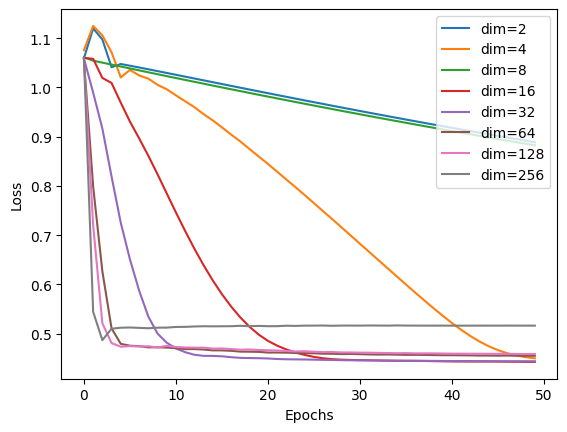

In [24]:
for i in range(len(latent_dim)):
    plt.plot(train_dim[i], label=f"dim={latent_dim[i]}")
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

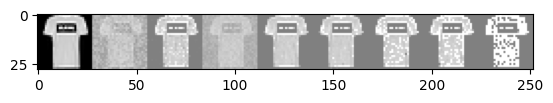

In [25]:
# Evaluation
import numpy as np

gt_image = image.to(device)

pred_images = []
for dim in latent_dim:
    net = torch.load(f'model_dim{dim}.pth')
    net.to(device)
    pred_image = torch.zeros_like(image).to(device)
    with torch.no_grad():
        net.eval()
        pred = net(gt_image.view(-1, feat_size))
        pred_image = pred.view(image.size())
    pred_image = pred_image.cpu()
    pred_images.append(pred_image)

gt_image = gt_image.cpu()

# Corrected line
join_image = torch.cat([gt_image] + pred_images, 1)
plt.imshow(join_image.squeeze(), cmap="gray")
plt.show()


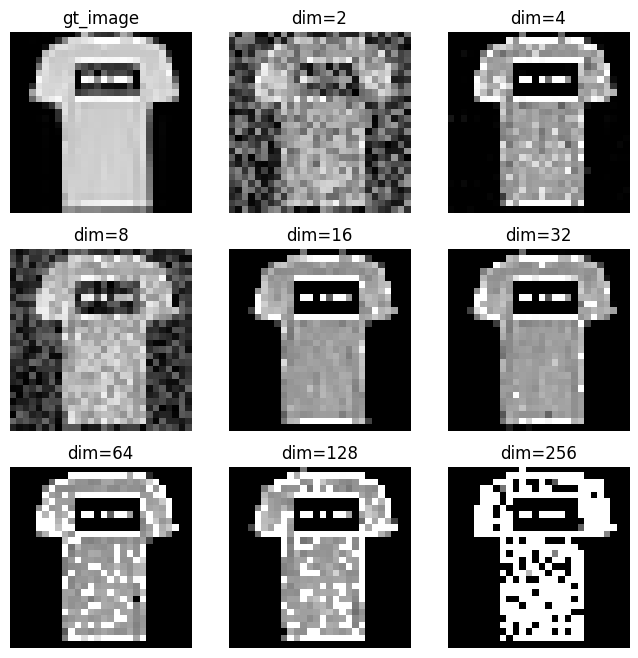

In [28]:
labels_map = {
    0: "gt_image",
    1: "dim=2",
    2: "dim=4",
    3: "dim=8",
    4: "dim=16",
    5: "dim=32",
    6: "dim=64",
    7: "dim=128",
    8: "dim=256"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    if i == 1:
        img = gt_image
        label = 0
    else:
        img, label = pred_images[i-2], i-1
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()